# Breast Cancer Detection

#### 1. Data Loading and Exploration:
   - Loading breast histopathology images and displaying a few examples from both classes (IDC positive and negative).
   - Understanding the distribution of images for each class.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image

C:\Users\rhyth\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
breast_img = glob.glob('archive (1)/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

archive (1)\10253\0\10253_idx5_x1001_y1001_class0.png
archive (1)\10253\0\10253_idx5_x1001_y1051_class0.png
archive (1)\10253\0\10253_idx5_x1001_y1101_class0.png


In [6]:
breast_img

['archive (1)\\10253\\0\\10253_idx5_x1001_y1001_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1051_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1101_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1151_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1201_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1251_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1301_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1351_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1501_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1551_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y1701_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y351_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y401_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y451_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y501_class0.png',
 'archive (1)\\10253\\0\\10253_idx5_x1001_y551_class0.png',
 'archive (1)\\10253\\0\\1025

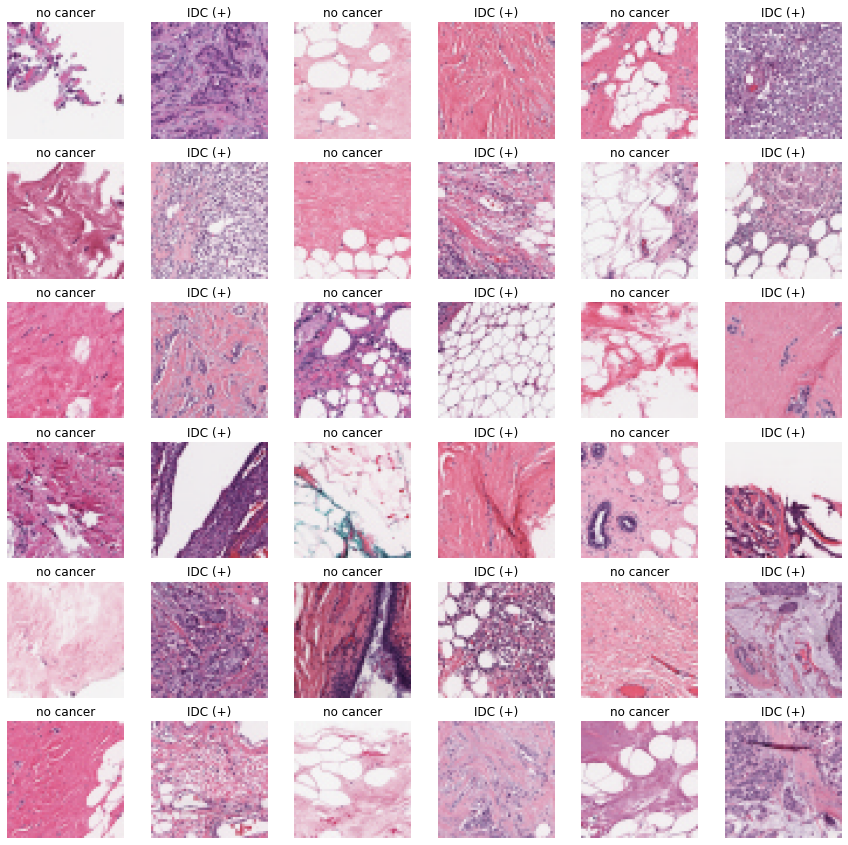

In [4]:
N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [7]:
NewN_IDC=N_IDC[:78786]
print(len(NewN_IDC))
print(len(P_IDC))

78786
157572


#### 2. Data Preprocessing:
   - Resizing images to a uniform size (50x50) for model training.
   - Creating image arrays for IDC positive and negative classes.
   - Creating labels for classification.



In [8]:
non_img_arr = []
can_img_arr = []

for img in NewN_IDC:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [17]:
non_labels = [0] * len(non_img_arr) 
can_labels = [1] * len(can_img_arr)

In [9]:
print(len(non_img_arr))
print(len(can_img_arr))
print(len(non_img_arr)+len(can_img_arr))

78786
157572
236358


In [31]:
len(non_img_arr)

78786

In [32]:
sd = non_img_arr+can_img_arr
len(sd)

236358

In [33]:
X = []
y = []

breast_img_arr = non_img_arr+can_img_arr
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

In [34]:
X

array([[[[246, 247, 247],
         [246, 247, 247],
         [248, 249, 249],
         ...,
         [246, 248, 247],
         [247, 250, 248],
         [248, 251, 249]],

        [[244, 246, 246],
         [245, 246, 246],
         [247, 249, 248],
         ...,
         [246, 249, 248],
         [247, 250, 248],
         [248, 251, 249]],

        [[244, 246, 246],
         [245, 247, 246],
         [247, 248, 247],
         ...,
         [246, 248, 248],
         [247, 249, 248],
         [247, 250, 249]],

        ...,

        [[200, 180, 228],
         [242, 237, 245],
         [222, 211, 227],
         ...,
         [152, 128, 185],
         [144, 131, 180],
         [227, 222, 238]],

        [[185, 160, 209],
         [192, 169, 216],
         [145, 107, 194],
         ...,
         [179, 173, 192],
         [242, 244, 246],
         [184, 159, 204]],

        [[248, 246, 249],
         [223, 216, 235],
         [131,  94, 196],
         ...,
         [248, 245, 251],
        

In [35]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [36]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 236358
Number of IDC(-) Images: 78786
Number of IDC(+) Images: 157572
Image shape (Width, Height, Channels): (50, 50, 3)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (165450, 50, 50, 3)
Testing Data Shape: (70908, 50, 50, 3)


#### 3. Model Building and Training:
   - Constructing a Convolutional Neural Network (CNN) model architecture with multiple convolutional layers, batch normalization, dropout, and dense layers.
   - Compiling the model using appropriate loss function and optimizer.
   - Training the model on the prepared data.
   - Visualizing model performance (accuracy and loss) during training through plots.


In [38]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [39]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [40]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 50, 50, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 25, 25, 32)        128       
 chNormalization)                                                
                                                        

In [43]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 40, batch_size = 35)

Epoch 1/40
4728/4728 [==============================] - 618s 131ms/step - loss: 0.3523 - accuracy: 0.8528 - val_loss: 0.3080 - val_accuracy: 0.8738
Epoch 2/40
4728/4728 [==============================] - 619s 131ms/step - loss: 0.3089 - accuracy: 0.8726 - val_loss: 0.3003 - val_accuracy: 0.8787
Epoch 3/40
4728/4728 [==============================] - 652s 138ms/step - loss: 0.2901 - accuracy: 0.8816 - val_loss: 0.2723 - val_accuracy: 0.8908
Epoch 4/40
4728/4728 [==============================] - 660s 140ms/step - loss: 0.2739 - accuracy: 0.8889 - val_loss: 0.2658 - val_accuracy: 0.8913
Epoch 5/40
4728/4728 [==============================] - 664s 141ms/step - loss: 0.2607 - accuracy: 0.8939 - val_loss: 0.2788 - val_accuracy: 0.8929
Epoch 6/40
4728/4728 [==============================] - 661s 140ms/step - loss: 0.2483 - accuracy: 0.8996 - val_loss: 0.2469 - val_accuracy: 0.9024
Epoch 7/40
4728/4728 [==============================] - 666s 141ms/step - loss: 0.2408 - accuracy: 0.9024 - val_


#### 4. Model Evaluation:
   - Evaluating the trained model on the test set.
   - Generating a confusion matrix and heatmap to analyze model predictions.




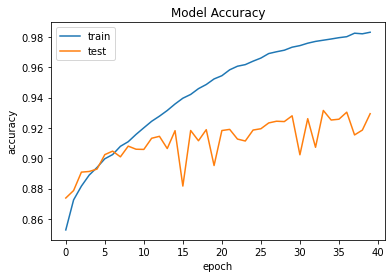

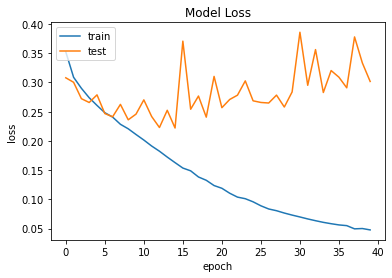

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2216/2216 [==============================] - 65s 29ms/step


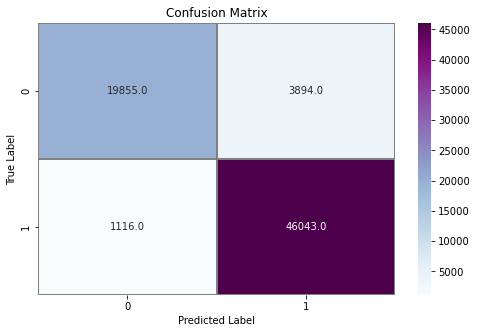

In [46]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
#accuracy=accuracy_score(y_true=Y_true, y_pred=Y_pred)
#print(accuracy)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

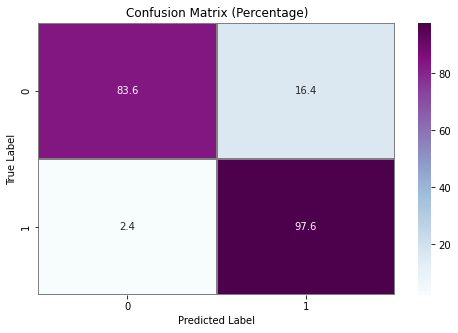

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1) 
Y_true = np.argmax(Y_test, axis=1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# calculate the percentage
confusion_mtx_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_mtx_percent, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [48]:
model.evaluate(X_test,Y_test)

2216/2216 [==============================] - 65s 29ms/step - loss: 0.3017 - accuracy: 0.9293


[0.3017460107803345, 0.9293450713157654]

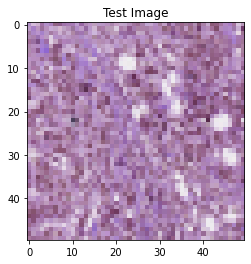

In [52]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 1000
img_plot(X_test, index)

In [50]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
index = 4000
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 92ms/step
Predicted Value using  cnn model 0
True Value 0


#### 5. Prediction and Save:
   - Displaying and predicting single test images from the dataset.
   - Saving the trained model for future use.

In [51]:
model.save("Deploy/Brest_CNN.h5")

C:\Users\rhyth\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
